In [1]:
%pwd

'C:\\Users\\user\\Documents\\GitHub\\studying_ml'

In [2]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 445D-2AE5

 C:\Users\user\Documents\GitHub\studying_ml 디렉터리

2023-03-10  오후 02:47    <DIR>          .
2023-02-27  오후 12:11    <DIR>          ..
2023-03-07  오후 03:44    <DIR>          .ipynb_checkpoints
2023-03-07  오후 03:23            73,781 activation_function.ipynb
2023-03-07  오후 03:45               589 AlexNet.ipynb
2023-03-07  오후 03:57    <DIR>          content
2023-03-07  오후 03:23             2,730 else_function.ipynb
2023-03-10  오후 02:47            55,567 LeNet-5.ipynb
2023-03-10  오후 02:25    <DIR>          model
2023-03-07  오전 10:38             1,757 read_csv_parallel.ipynb
2023-02-27  오후 01:28             7,388 Regression.ipynb
2023-03-05  오후 08:55             5,671 transfer_learning_example.ipynb
               7개 파일             147,483 바이트
               5개 디렉터리  166,259,101,696 바이트 남음


In [3]:
from torchvision import transforms

# MNIST 데이터에 사용할 transformation 객체 생성 및 정의
data_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

In [4]:
print(data_transform)

Compose(
    Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
    ToTensor()
)


In [5]:
from torchvision import datasets

# 데이터 셋 저장 및 불러오기
path2data = './content/data_mnist'

training_data = datasets.MNIST(path2data, train=True, download=True, transform=data_transform)

val_data = datasets.MNIST(path2data, train=False, download=True, transform=data_transform)

print(training_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./content/data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [6]:
print(val_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./content/data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [7]:
from torch.utils.data import DataLoader

#MNIST 데이터를 DataLoader로 wrapping
train_dl = DataLoader(training_data, batch_size=32, shuffle=True)

val_dl = DataLoader(val_data, batch_size=32)

print(train_dl)

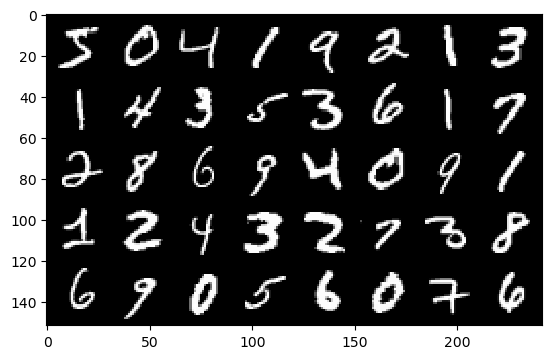

In [8]:
# 샘플 이미지 확인
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
# matplotlib 때문에 커널이 죽어서 추가
# mkl 라이브러리가 여러곳에 있어서 중복 실행되는 문제
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline

#훈련데이터 추출
x_train, y_train = training_data.data, training_data.targets

# 검증데이터 추출
x_val, y_val = val_data.data, val_data.targets

# 차원 추가
if len(x_train.shape) == 3:
    x_train = x_train.unsqueeze(1)
    
if len(x_val.shape) == 3:
    x_val = x_val.unsqueeze(1)

def show(img):
    # tensor를 numpy array로 변경
    npimg = img.numpy()
    
    #C*H*W를 H*W*C로 변경
    npimg_tr = npimg.transpose((1,2,0))
    
    plt.imshow(npimg_tr, interpolation='nearest')
    
# img grid를 생성하고 출력
# 총 40개의 이미지 행당 8개 출력
x_grid = utils.make_grid(x_train[:40], nrow=8, padding=2)

show(x_grid)

In [9]:
from torch import nn
import torch.nn.functional as F

# LeNet5는 activation function으로 tanh와 pooling에 average pooling 사용
class LeNet_5(nn.Module):
    def __init__(self):
        super(LeNet_5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = F.avg_pool2d(x, 2, 2)
        x = F.tanh(self.conv2(x))
        x = F.avg_pool2d(x, 2, 2)
        x = F.tanh(self.conv3(x))
        x = x.view(-1, 120)
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)

model = LeNet_5()

print(model)

LeNet_5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


In [10]:
import torch

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [11]:
model.to(device)

LeNet_5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [12]:
print(next(model.parameters()).device)

cpu


In [13]:
!pip install torchsummary

In [14]:
from torchsummary import summary
summary(model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Conv2d-3            [-1, 120, 1, 1]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


C:\Users\user\anaconda3\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [15]:
# loss funcion 정의 분류이므로 cross entropy 사용
loss_func = nn.CrossEntropyLoss(reduction='sum')

In [16]:
print(loss_func)

CrossEntropyLoss()


In [17]:
# optimizer 정의
from torch import optim
opt = optim.Adam(model.parameters(), lr=0.001)

# 현재 lr 계산 함수
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
    
# lr 스케쥴러 정의
from torch.optim.lr_scheduler import CosineAnnealingLR

lr_scheduler = CosineAnnealingLR(opt, T_max=2, eta_min=1e-05)

In [18]:
# batch당 perfomace metric을 계산하는 함수
def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [19]:
# batch당 loss 계산 함수
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [20]:
# epoch당 loss와 performace metric 계산 함수
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)
    
    for xb, yb in dataset_dl:
        xb = xb.type(torch.float).to(device)
        yb = yb.to(device)
        output = model(xb)
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b
        
        if sanity_check is True:
            break
            
    loss = running_loss / float(len_data)
    metric = running_metric / float(len_data)
    return loss, metric

In [21]:
import copy

# train_val 함수
def train_val(model, params):
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']
    
    loss_history = {
        'train': [],
        'val': []
    }
    
    metric_history = {
        'train': [],
        'val': []
    }
    
    # best model 파라미터 저장
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check,opt)
        
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
            
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)           
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights")
            
        lr_scheduler.step()
        
        print("train loss : %.6f, dev loss: %.6f, accuracy: %.2f" % (train_loss, val_loss, 100*val_metric))
        
        print("-"*10)
    
    #best model 반환
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history    

In [22]:
params_train = {
    'num_epochs': 5,
    'loss_func': loss_func,
    'optimizer': opt,
    'train_dl': train_dl,
    'val_dl': val_dl,
    'sanity_check': False,
    'lr_scheduler': lr_scheduler,
    'path2weights': './model/lenet5.pt'
}

In [23]:
model, loss_hist, metric_hist = train_val(model, params_train) 

Epoch 0/4, current lr=0.001
Copied best model weights
train loss : 1.555869, dev loss: 1.499577, accuracy: 96.48
----------
Epoch 1/4, current lr=0.000505
Copied best model weights
train loss : 1.492128, dev loss: 1.487104, accuracy: 97.62
----------
Epoch 2/4, current lr=1e-05
Copied best model weights
train loss : 1.483390, dev loss: 1.485409, accuracy: 97.80
----------
Epoch 3/4, current lr=0.0005049999999999999
Copied best model weights
train loss : 1.484741, dev loss: 1.484137, accuracy: 97.89
----------
Epoch 4/4, current lr=0.001
train loss : 1.486944, dev loss: 1.491415, accuracy: 97.11
----------


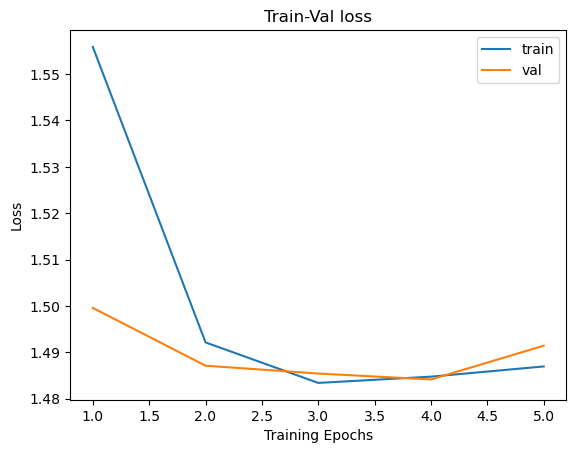

In [25]:
num_epochs = params_train['num_epochs']

# loss plot
plt.title('Train-Val loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylabel('Loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

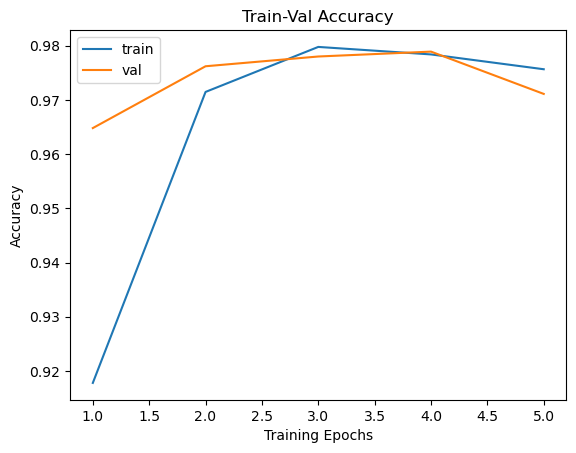

In [26]:
# accuracy plot
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()